In [1]:
from multiprocessing.dummy import Pool
import matplotlib.pyplot as plt
import numpy as np
import time
from graph1_alt_func import create_clauses, assess_number_of_unknowns, get_primes_lower_than_n, split_list
import time

In [2]:
def main(primes):
    for p in primes:
        for q in primes:
            if p < q:
                continue
            m = p * q
            p_dict, q_dict, z_dict, _ = create_clauses(
                m, p, q, apply_preprocessing=True, verbose=False
            )
            x, z = assess_number_of_unknowns(p_dict, q_dict, z_dict)
            return [m, x, z]

[[3], [5], [7], [11], [13], [17], [19], [23], [29], [31], [37], [41], [43], [47], [53], [59], [61], [67], [71], [73], [79], [83], [89], [97], [101], [103], [107], [109], [113], [127], [131], [137], [139], [149], [151], [157], [163], [167], [173], [179], [181], [191], [193], [197], [199], [211], [223], [227], [229], [233], [239], [241], [251], [257], [263], [269], [271], [277], [281], [283], [293], [307], [311], [313]]
total time: 50.01504069600196 s


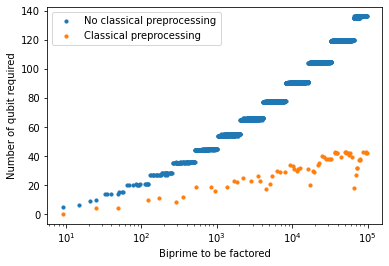

In [3]:
threshold = 1e5
primes = get_primes_lower_than_n(int(np.sqrt(threshold)))
primes = primes[1:]

qubits_required_no_preprocessing = []
qubits_required_with_preprocessing = []
initial_time = time.time()
# file_name = "preprocessing_full_results.csv"
# plot_name = "reprocessing_full_plot.png"
file_name = "./data/preprocessing_"+str(int(threshold))+"_results.csv"
plot_name = "./data/reprocessing_"+str(int(threshold))+"_plot.png"
    
primes_split = list(split_list(primes, 1))
print(primes_split)
p = Pool()

start = time.perf_counter()
qubits_required_with_preprocessing = list(p.imap_unordered(main, primes_split))
end = time.perf_counter()
tottime = end - start
print(f'total time: {tottime} s')
    
np.savetxt(
            file_name,
             np.array(qubits_required_with_preprocessing),
            delimiter=",",
            fmt="%.d",
            header="m,unknowns,carry_bits",
            comments="",
            )
    
qubits_required_no_preprocessing = np.genfromtxt(
        "./data/no_preprocessing.csv", skip_header=1, delimiter=","
    )
qubits_required_with_preprocessing = np.genfromtxt(
        "./data/preprocessing_"+str(int(threshold))+"_results.csv", skip_header=1, delimiter=","
    )
    #print("Total time:", np.round((end_time - initial_time) / 60, 3), "[min]")

data_1 = np.array(qubits_required_no_preprocessing)
data_2 = np.array(qubits_required_with_preprocessing)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(data_1[:, 0], data_1[:, 1], label="No classical preprocessing", s=10)
ax.scatter(data_2[:, 0], data_2[:, 1], label="Classical preprocessing", s=10)
ax.set_xlabel("Biprime to be factored")
ax.set_ylabel("Number of qubit required")
ax.set_xscale('log')
plt.legend()
plt.savefig(plot_name)
plt.show()
    

[[3, 5, 7, 11, 13], [17, 19, 23, 29, 31], [37, 41, 43, 47, 53], [59, 61, 67, 71, 73], [79, 83, 89, 97, 101], [103, 107, 109, 113, 127], [131, 137, 139, 149, 151], [157, 163, 167, 173, 179], [181, 191, 193, 197, 199], [211, 223, 227, 229, 233], [239, 241, 251, 257, 263], [269, 271, 277, 281, 283], [293, 307, 311, 313]]
total time: 9.678595542995026 s


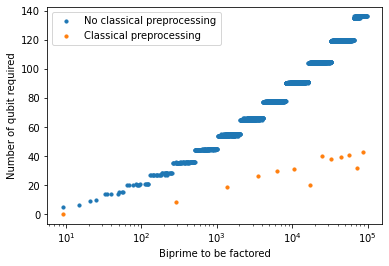

In [4]:
threshold = 1e5
primes = get_primes_lower_than_n(int(np.sqrt(threshold)))
primes = primes[1:]

qubits_required_no_preprocessing = []
qubits_required_with_preprocessing = []
initial_time = time.time()
# file_name = "preprocessing_full_results.csv"
# plot_name = "reprocessing_full_plot.png"
file_name = "./data/preprocessing_"+str(int(threshold))+"_results.csv"
plot_name = "./data/reprocessing_"+str(int(threshold))+"_plot.png"
    
primes_split = list(split_list(primes, 5))
print(primes_split)
p = Pool()

start = time.perf_counter()
qubits_required_with_preprocessing = list(p.imap_unordered(main, primes_split))
end = time.perf_counter()
tottime = end - start
print(f'total time: {tottime} s')
    
np.savetxt(
            file_name,
             np.array(qubits_required_with_preprocessing),
            delimiter=",",
            fmt="%.d",
            header="m,unknowns,carry_bits",
            comments="",
            )
    
qubits_required_no_preprocessing = np.genfromtxt(
        "./data/no_preprocessing.csv", skip_header=1, delimiter=","
    )
qubits_required_with_preprocessing = np.genfromtxt(
        "./data/preprocessing_"+str(int(threshold))+"_results.csv", skip_header=1, delimiter=","
    )
    #print("Total time:", np.round((end_time - initial_time) / 60, 3), "[min]")

data_1 = np.array(qubits_required_no_preprocessing)
data_2 = np.array(qubits_required_with_preprocessing)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(data_1[:, 0], data_1[:, 1], label="No classical preprocessing", s=10)
ax.scatter(data_2[:, 0], data_2[:, 1], label="Classical preprocessing", s=10)
ax.set_xlabel("Biprime to be factored")
ax.set_ylabel("Number of qubit required")
ax.set_xscale('log')
plt.legend()
plt.savefig(plot_name)
plt.show()

[[3, 5, 7, 11, 13, 17, 19, 23, 29, 31], [37, 41, 43, 47, 53, 59, 61, 67, 71, 73], [79, 83, 89, 97, 101, 103, 107, 109, 113, 127], [131, 137, 139, 149, 151, 157, 163, 167, 173, 179], [181, 191, 193, 197, 199, 211, 223, 227, 229, 233], [239, 241, 251, 257, 263, 269, 271, 277, 281, 283], [293, 307, 311, 313]]
total time: 4.867410238002776 s


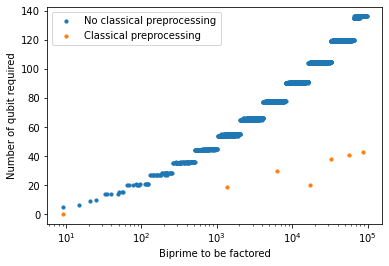

In [5]:
threshold = 1e5
primes = get_primes_lower_than_n(int(np.sqrt(threshold)))
primes = primes[1:]

qubits_required_no_preprocessing = []
qubits_required_with_preprocessing = []
initial_time = time.time()
# file_name = "preprocessing_full_results.csv"
# plot_name = "reprocessing_full_plot.png"
file_name = "./data/preprocessing_"+str(int(threshold))+"_results.csv"
plot_name = "./data/reprocessing_"+str(int(threshold))+"_plot.png"
    
primes_split = list(split_list(primes, 10))
print(primes_split)
p = Pool()

start = time.perf_counter()
qubits_required_with_preprocessing = list(p.imap_unordered(main, primes_split))
end = time.perf_counter()
tottime = end - start
print(f'total time: {tottime} s')
    
np.savetxt(
            file_name,
             np.array(qubits_required_with_preprocessing),
            delimiter=",",
            fmt="%.d",
            header="m,unknowns,carry_bits",
            comments="",
            )
    
qubits_required_no_preprocessing = np.genfromtxt(
        "./data/no_preprocessing.csv", skip_header=1, delimiter=","
    )
qubits_required_with_preprocessing = np.genfromtxt(
        "./data/preprocessing_"+str(int(threshold))+"_results.csv", skip_header=1, delimiter=","
    )
    #print("Total time:", np.round((end_time - initial_time) / 60, 3), "[min]")

data_1 = np.array(qubits_required_no_preprocessing)
data_2 = np.array(qubits_required_with_preprocessing)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(data_1[:, 0], data_1[:, 1], label="No classical preprocessing", s=10)
ax.scatter(data_2[:, 0], data_2[:, 1], label="Classical preprocessing", s=10)
ax.set_xlabel("Biprime to be factored")
ax.set_ylabel("Number of qubit required")
ax.set_xscale('log')
plt.legend()
plt.savefig(plot_name)
plt.show()
    